In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sbody = '2004 PY107'
objname = '2004PY107'
dt=500.
#path = 'Asteroids/'+objname
path = 'TNOs/'+objname
series = pd.read_csv(path+'/series.csv')

t = series['t'].values
a = series['a'].values
e = series['e'].values
inc = series['inc'].values*np.pi/180
#omega = series['omega'].values*np.pi/180
#Omega = series['Omega'].values*np.pi/180
#M = series['M'].values*np.pi/180
#h = np.sin(inc)*np.sin(Omega)
#k = np.sin(inc)*np.cos(Omega)
#p = e*np.sin(Omega+omega)
#q = e*np.cos(Omega+omega)

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

plt.scatter(t,h)
plt.show()
plt.scatter(t,h-np.sin(t))

NameError: name 'h' is not defined

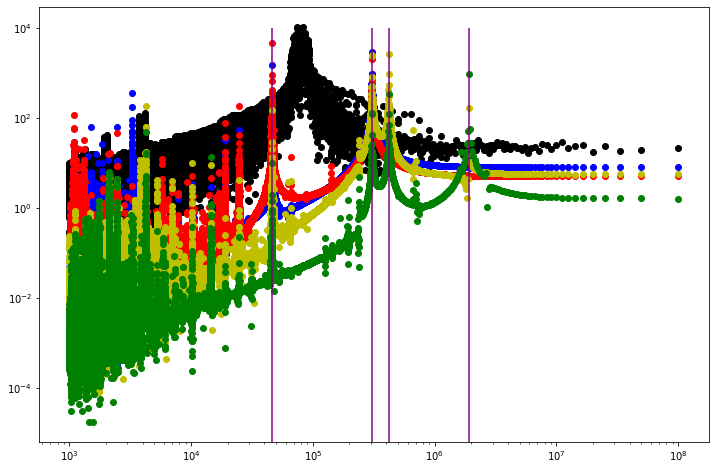

In [16]:
pYh = np.abs(np.fft.rfft(h))
pYhj = np.abs(np.fft.rfft(hj))
pYhs = np.abs(np.fft.rfft(hs))
pYhu = np.abs(np.fft.rfft(hu))
pYhn = np.abs(np.fft.rfft(hn))

ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 

n = len(h)
freq = np.fft.rfftfreq(n,d=dt)
plt.figure(figsize=(12,8))
xs = [1,10000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.scatter(1/freq[1:],pYhs[1:],label='particle',c='r')
plt.scatter(1/freq[1:],pYhu[1:],label='particle',c='y')
plt.scatter(1/freq[1:],pYhn[1:],label='particle',c='g')
plt.xscale('log')
plt.yscale('log')

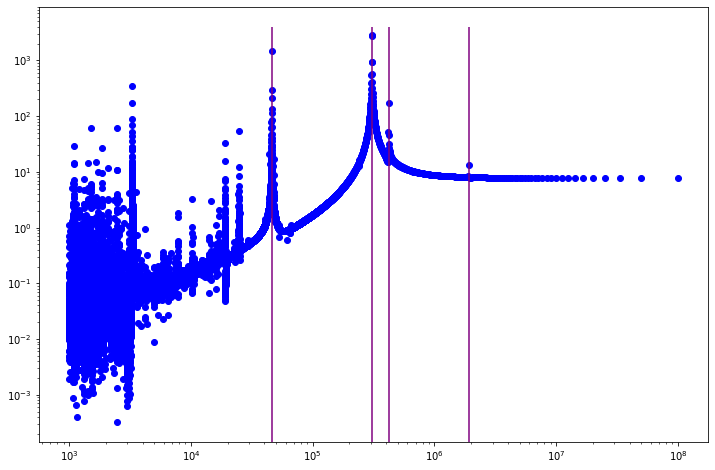

In [22]:
plt.figure(figsize=(12,8))
xs = [1,4000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.xscale('log')
plt.yscale('log')

100001 327
[-8.36205031e-05  8.02021116e-01  4.27867825e-01]


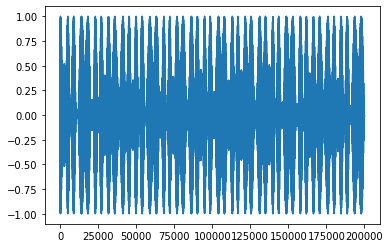

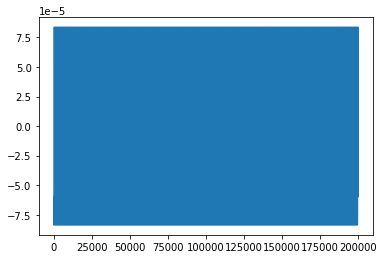

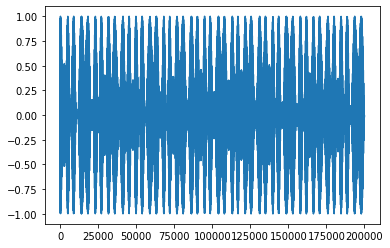

In [85]:
from scipy.optimize import minimize 
from scipy import stats
#x = np.linspace(-10, 30, 100)

print(len(pYhj),ihjmax)
x = t

#print(x)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = h

def MLE_Norm(parameters, freq):
    # extract parameters
    const, phase, std_dev = parameters
    # predict the output
    pred = const*np.sin(freq*2*np.pi*t+phase)
    #pred = const/beta/np.sqrt(2*np.pi)*np.exp(-0.5*((x-std_dev)/beta)**2)
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL

mle_model = minimize(MLE_Norm, np.array([1,0.5,2]), method='Nelder-Mead', args=freq[ihjmax])
print(mle_model.x)

plt.plot(y)
plt.show()
const = mle_model.x[0]
phase = mle_model.x[1]
std_dev = mle_model.x[2]

#const = 35000
#beta = 300
#std_dev = 5
guess = const*np.sin(freq[ihjmax]*2*np.pi*x+phase)
#print(guess)
plt.plot(guess)
plt.show()

plt.plot(y-guess)


In [4]:
from rocks import Rock
ceres = Rock("2004 py107")
print(ceres.e)

0.09768007 +- 0.00000010 


In [175]:
gp_data = pd.read_csv('gp_freqs.csv')

astdys = pd.read_csv('TNOs/astdys_tnos.csv')
print(gp_data.columns)
print(astdys.columns)
drop_cols = []
for i in range(len(astdys)):
    obj = astdys['Name'][i]
    horizons = pd.read_csv('TNOs/'+obj+'/horizon_data.csv')
    
    series = pd.read_csv('TNOs/'+obj+'/series.csv')
    sma_fin = series['a'].values[-1]
    vals = series['ecc'].values >= 1
    if horizons['flag'][0] == 0:
        drop_cols.append(i)
        print('obj ', obj, ' didn\'t run because of jpl horizons')
    
    elif sma_fin > 80 or sma_fin < 20:
        drop_cols.append(i)
        print('obj ', obj, ' was ejected in simulation with final sma = ', series['a'].values[-1])
    
    elif np.any(vals):
        drop_cols.append(i)
        print('obj ', obj, ' was ejected in simulation with final ecc = ', series['ecc'].values[-1])

astdys = astdys.drop(drop_cols)
gp_data = gp_data.drop(drop_cols)
print(len(drop_cols), ' systems cannot produce good proper elements due to JPL Horizons or an ejection during simulation')


Index(['Unnamed: 0', 'h_j_amp', 'k_j_amp', 'p_j_amp', 'q_j_amp', 'h_s_amp',
       'k_s_amp', 'p_s_amp', 'q_s_amp', 'h_u_amp', 'k_u_amp', 'p_u_amp',
       'q_u_amp', 'h_n_amp', 'k_n_amp', 'p_n_amp', 'q_n_amp', 'h_j_freq',
       'k_j_freq', 'p_j_freq', 'q_j_freq', 'h_s_freq', 'k_s_freq', 'p_s_freq',
       'q_s_freq', 'h_u_freq', 'k_u_freq', 'p_u_freq', 'q_u_freq', 'h_n_freq',
       'k_n_freq', 'p_n_freq', 'q_n_freq'],
      dtype='object')
Index(['Name', 'mag.', 'a(AU)', 'e', 'sinI', 'n(deg/yr)', 'g("/y)', 's("/yr)',
       'LCEx1E6', 'My'],
      dtype='object')
obj  33340  was ejected in simulation with final sma =  -706.6601091370212
obj  50000  didn't run because of jpl horizons
obj  119067  was ejected in simulation with final sma =  -1781.6954669667527
obj  119069  was ejected in simulation with final sma =  -9799.583500160712
obj  134340  didn't run because of jpl horizons
obj  307463  was ejected in simulation with final sma =  -4769.851979300467
obj  385571  was ejected in 

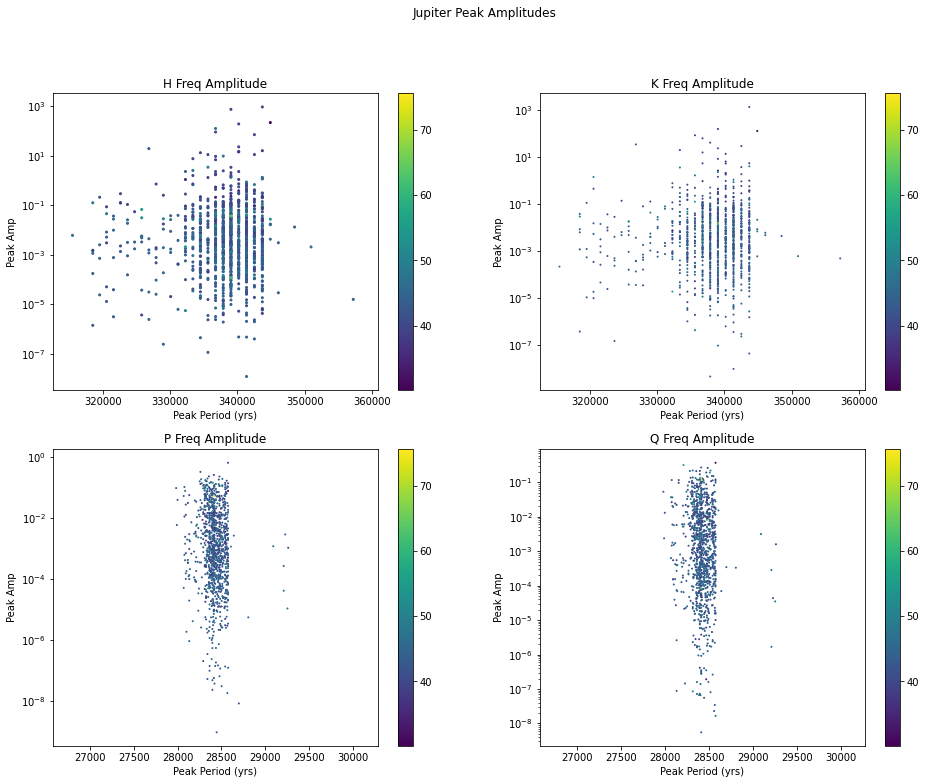

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_j_freq'],np.abs(gp_data['h_j_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_j_freq'],np.abs(gp_data['k_j_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_j_freq'],np.abs(gp_data['p_j_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_j_freq'],np.abs(gp_data['q_j_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_j_freq'])-np.std(1/gp_data['k_j_freq']),np.mean(1/gp_data['k_j_freq'])+np.std(1/gp_data['k_j_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_j_freq'])-np.std(1/gp_data['p_j_freq']),np.mean(1/gp_data['p_j_freq'])+np.std(1/gp_data['p_j_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_j_freq'])-np.std(1/gp_data['q_j_freq']),np.mean(1/gp_data['q_j_freq'])+np.std(1/gp_data['q_j_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()

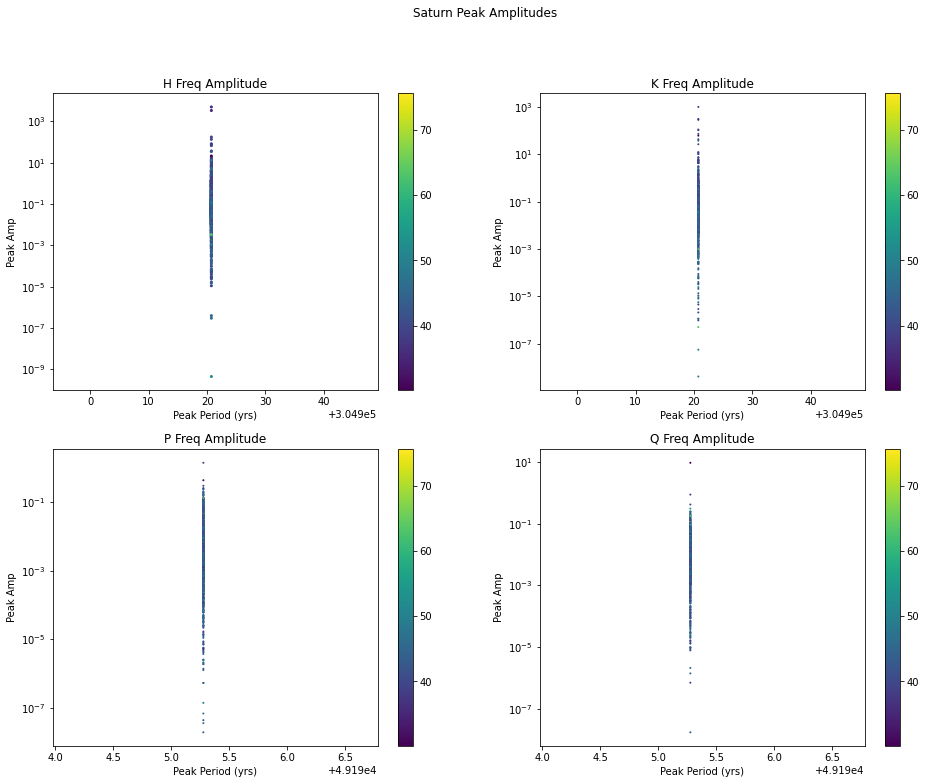

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_s_freq'],np.abs(gp_data['h_s_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_s_freq'],np.abs(gp_data['k_s_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_s_freq'],np.abs(gp_data['p_s_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_s_freq'],np.abs(gp_data['q_s_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_s_freq'])-np.std(1/gp_data['h_s_freq']),np.mean(1/gp_data['h_s_freq'])+np.std(1/gp_data['h_s_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_s_freq'])-np.std(1/gp_data['k_s_freq']),np.mean(1/gp_data['k_s_freq'])+np.std(1/gp_data['k_s_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_s_freq'])-np.std(1/gp_data['p_s_freq']),np.mean(1/gp_data['p_s_freq'])+np.std(1/gp_data['p_s_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_s_freq'])-np.std(1/gp_data['q_s_freq']),np.mean(1/gp_data['q_s_freq'])+np.std(1/gp_data['q_s_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Saturn Peak Amplitudes')
plt.show()

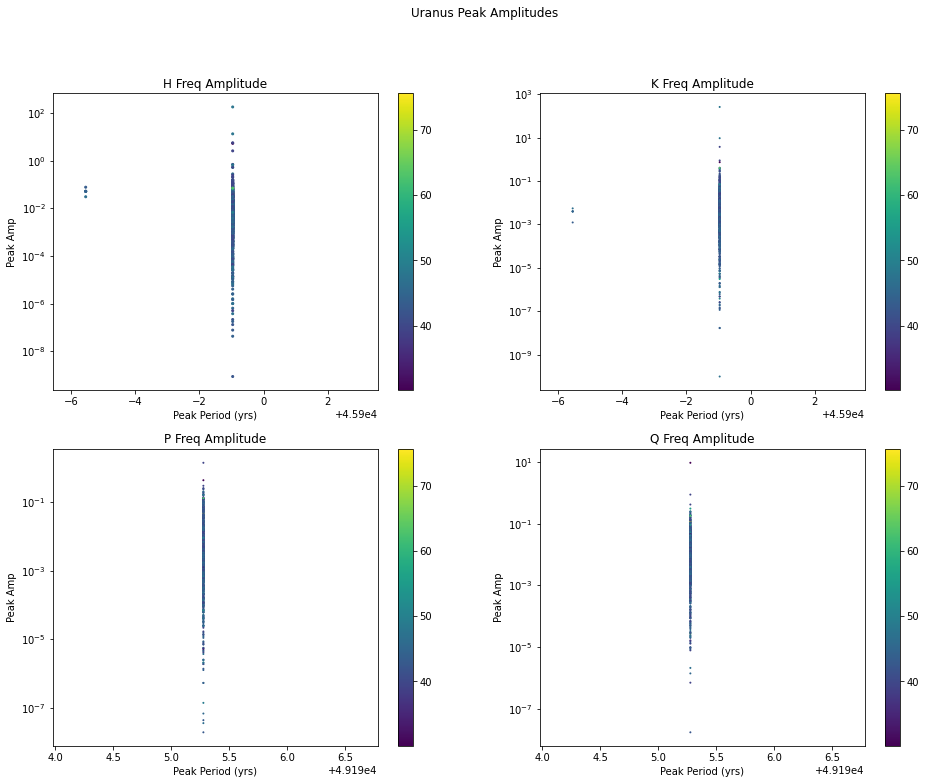

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_u_freq'],np.abs(gp_data['h_u_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_u_freq'],np.abs(gp_data['k_u_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_u_freq'],np.abs(gp_data['p_u_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_u_freq'],np.abs(gp_data['q_u_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_u_freq'])-np.std(1/gp_data['h_u_freq']),np.mean(1/gp_data['h_u_freq'])+np.std(1/gp_data['h_u_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_u_freq'])-np.std(1/gp_data['k_u_freq']),np.mean(1/gp_data['k_u_freq'])+np.std(1/gp_data['k_u_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_u_freq'])-np.std(1/gp_data['p_u_freq']),np.mean(1/gp_data['p_u_freq'])+np.std(1/gp_data['p_u_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_u_freq'])-np.std(1/gp_data['q_u_freq']),np.mean(1/gp_data['q_u_freq'])+np.std(1/gp_data['q_u_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Uranus Peak Amplitudes')
plt.show()

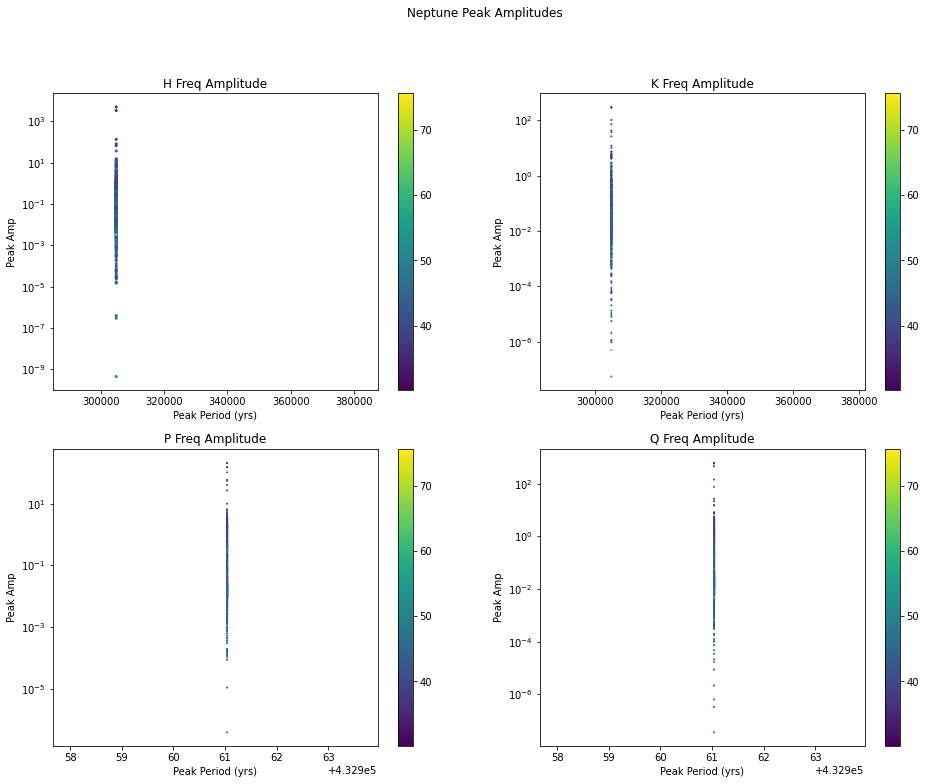

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_n_freq'],np.abs(gp_data['h_n_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_n_freq'],np.abs(gp_data['k_n_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_n_freq'],np.abs(gp_data['p_n_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_n_freq'],np.abs(gp_data['q_n_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_n_freq'])-np.std(1/gp_data['h_n_freq']),np.mean(1/gp_data['h_n_freq'])+np.std(1/gp_data['h_n_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_n_freq'])-np.std(1/gp_data['k_n_freq']),np.mean(1/gp_data['k_n_freq'])+np.std(1/gp_data['k_n_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_n_freq'])-np.std(1/gp_data['p_n_freq']),np.mean(1/gp_data['p_n_freq'])+np.std(1/gp_data['p_n_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_n_freq'])-np.std(1/gp_data['q_n_freq']),np.mean(1/gp_data['q_n_freq'])+np.std(1/gp_data['q_n_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Neptune Peak Amplitudes')
plt.show()

54
1132


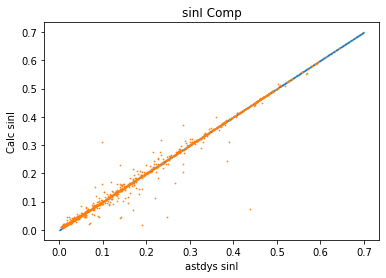

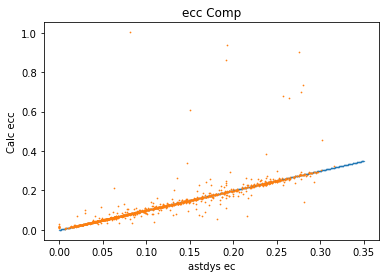

In [182]:
prop_elem = pd.read_csv('prop_elem.csv')
prop_elem = prop_elem.drop(drop_cols)

print(len(drop_cols))
print(len(prop_elem))
#for i in range(len(astdys)):
#    series = pd.read_csv()
data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.7
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=0.5)
plt.title('sinI Comp')
plt.xlabel('astdys sinI')
plt.ylabel('Calc sinI')
#plt.gca().set_aspect('equal')
plt.show()

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_ecc'],prop_elem['calc_ecc'],s=0.5)
#plt.gca().set_aspect('equal')
plt.title('ecc Comp')
plt.xlabel('astdys ec')
plt.ylabel('Calc ecc')
plt.show()

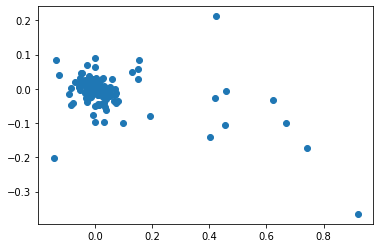

0.019816094545953827 0.05590567500300269
sinI RMSE:  0.019815996574585926
Ecc RMSE:  0.05568907014906247


In [181]:
sinI_res = prop_elem['calc_sinI']-prop_elem['ast_sinI']
ecc_res = prop_elem['calc_ecc']-prop_elem['ast_ecc']

plt.scatter(ecc_res,sinI_res)
plt.show()
#plt.plot(ecc_res)
#plt.show()

stddev_i = np.sqrt(np.sum(sinI_res**2)/len(sinI_res))
stddev_e = np.sqrt(np.sum(ecc_res**2)/len(sinI_res))

stddev_i = np.std(sinI_res)
stddev_e = np.std(ecc_res)
print(np.sqrt(np.mean(sinI_res**2)),np.sqrt(np.mean(ecc_res**2)))
print('sinI RMSE: ', stddev_i)
print('Ecc RMSE: ',stddev_e)

            Name  mag.      a(AU)         e      sinI n(deg/yr)     g("/y)  \
0          15760  7.10  43.980109  0.070356  0.043997  1.237778   0.417884   
1          15789  6.95  39.458334  0.184154  0.101916  1.456473  -0.916329   
2          15807  7.35  43.798207  0.072977  0.033014  1.245505   0.501449   
3          15809  7.64  42.328679  0.220231  0.224428  1.310848  -0.486295   
4          15810  7.71  39.460954  0.124711  0.059918  1.456372  -2.008044   
...          ...   ...        ...       ...       ...       ...        ...   
1181  2015 RS245  8.22  40.418790  0.098893  0.268945  1.404816   0.406734   
1182   2015 UK84  6.81  49.611299  0.247131  0.380083  1.033066   0.114719   
1183   2016 BP81  6.06  43.726579  0.064597  0.061642  1.248466   0.520000   
1184   2016 FP59  5.78  46.636875  0.160455  0.090706  1.133517   0.337515   
1185   2016 FW59  6.08  43.433848  0.076211  0.142732  1.261196   0.388558   

        s("/yr)  LCEx1E6   My  
0     -0.420035     0.03  100  

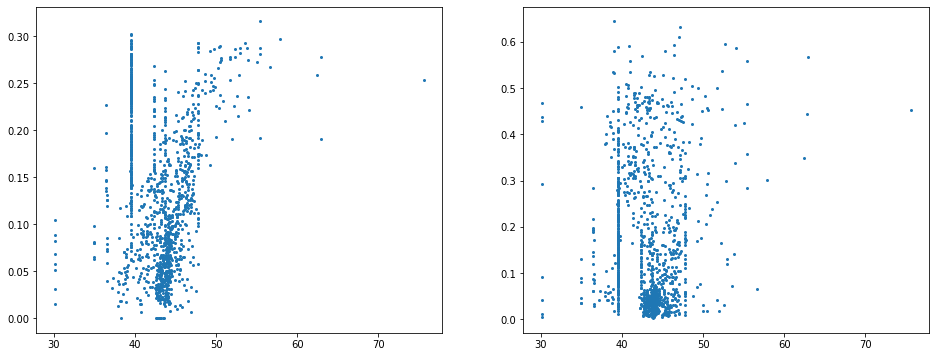

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
astdys = pd.read_csv('data_files/astdys_tnos.csv')

print(astdys)

fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(astdys['a(AU)'].values,astdys['e'].values,s=4)
ax[1].scatter(astdys['a(AU)'].values,astdys['sinI'].values,s=4)